## 1.

Create a Naive Bayes classifier (sklearn is ok) and describe diagnostic performance using F-Score, Sensitivity, Specificity, and Accuracy on the training and validation set.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report, log_loss
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Read in the train data
heart_train = pd.read_csv('hearttrain.csv')
heart_train.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,255,71.0,0.0,2.0,160.0,302.0,0.0,0.0,162.0,0.0,0.4,1.0,2.0,3.0,1
1,204,55.0,1.0,4.0,160.0,289.0,0.0,2.0,145.0,1.0,0.8,2.0,1.0,7.0,2
2,267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
3,92,54.0,1.0,4.0,124.0,266.0,0.0,2.0,109.0,1.0,2.2,2.0,1.0,7.0,2
4,149,41.0,0.0,3.0,112.0,268.0,0.0,2.0,172.0,1.0,0.0,1.0,0.0,3.0,1


In [3]:
# Convert data into a data frame
heart_train = pd.DataFrame(heart_train)
# Drop column 'Unnamed: 0'
heart_train = heart_train.drop('Unnamed: 0',1)
heart_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,71.0,0.0,2.0,160.0,302.0,0.0,0.0,162.0,0.0,0.4,1.0,2.0,3.0,1
1,55.0,1.0,4.0,160.0,289.0,0.0,2.0,145.0,1.0,0.8,2.0,1.0,7.0,2
2,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
3,54.0,1.0,4.0,124.0,266.0,0.0,2.0,109.0,1.0,2.2,2.0,1.0,7.0,2
4,41.0,0.0,3.0,112.0,268.0,0.0,2.0,172.0,1.0,0.0,1.0,0.0,3.0,1


In [4]:
heart_train.shape

(172, 14)

In [5]:
heart_train.dtypes # look at data types

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13      int64
dtype: object

In [6]:
heart_train.isnull().sum().sum() # see if there is any missing values

0

In [7]:
def naivebayes_model(data):
    x = data.iloc[:,0:13]
    y = data.iloc[:,13]
    
    model = GaussianNB() # Gaussian naive bayes because data is of continuous values
    model.fit(x,y)
    return model

In [8]:
nb_model_train = naivebayes_model(heart_train)

In [9]:
def metrics(model,data):
    x = data.iloc[:,0:13]
    y = data.iloc[:,13]
    
    predict_model = model.predict(x)
    
    accuracy = accuracy_score(y, predict_model)
    f1 = f1_score(y, predict_model)
    
    true_neg, false_pos, false_neg, true_pos = confusion_matrix(y, predict_model).ravel()
    sensitivity = true_pos/(true_pos + false_neg)
    specificity = true_neg/(true_neg + false_pos)
    
    print("The F1-Score is: {0}".format(round(f1,2)))
    print("The Sensitivity is: {0}".format(round(sensitivity,2)))
    print("The Specificity is: {0}".format(round(specificity,2)))
    print("The Accuracy is: {0}".format(round(accuracy,2)))

#### Diagnostic Performance for Heart Train Data Set

In [10]:
metrics(nb_model_train, heart_train)

The F1-Score is: 0.89
The Sensitivity is: 0.84
The Specificity is: 0.9
The Accuracy is: 0.87


In [11]:
# read in the validation data
heart_val = pd.read_csv('heartval.csv')
heart_val.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,87,59.0,1.0,1.0,178.0,270.0,0.0,2.0,145.0,0.0,4.2,3.0,0.0,7.0,1
1,119,56.0,1.0,4.0,130.0,283.0,1.0,2.0,103.0,1.0,1.6,3.0,0.0,7.0,2
2,30,57.0,1.0,3.0,128.0,229.0,0.0,2.0,150.0,0.0,0.4,2.0,1.0,7.0,2
3,7,59.0,1.0,4.0,110.0,239.0,0.0,2.0,142.0,1.0,1.2,2.0,1.0,7.0,2
4,20,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,2


In [12]:
# Convert data into a data frame
heart_val = pd.DataFrame(heart_val)
# Drop column 'Unnamed: 0'
heart_val = heart_val.drop('Unnamed: 0',1)
heart_val.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,59.0,1.0,1.0,178.0,270.0,0.0,2.0,145.0,0.0,4.2,3.0,0.0,7.0,1
1,56.0,1.0,4.0,130.0,283.0,1.0,2.0,103.0,1.0,1.6,3.0,0.0,7.0,2
2,57.0,1.0,3.0,128.0,229.0,0.0,2.0,150.0,0.0,0.4,2.0,1.0,7.0,2
3,59.0,1.0,4.0,110.0,239.0,0.0,2.0,142.0,1.0,1.2,2.0,1.0,7.0,2
4,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,2


In [13]:
heart_val.shape

(44, 14)

#### Diagnostic Performance for Heart Validation Data Set

In [14]:
metrics(nb_model_train,heart_val)

The F1-Score is: 0.74
The Sensitivity is: 0.85
The Specificity is: 0.67
The Accuracy is: 0.75


## 2.

Hypothesis: 

$$
\begin{aligned}
h_\theta = \frac{1}{1+exp(-\theta^{T}x)}
\end{aligned}
$$

Minimize cost function:

$$
\begin{aligned}
J(\theta) = - \frac{1}{m} \lbrack \sum_{i=1}^m y^{(i)} \text{log}h_\theta(x^{(i)}) + (1-y^{(i)})\text{log}(1-h_\theta(x^{(i)})) \rbrack
\end{aligned}
$$

Taking the derivative, the gradient is:

$$
\begin{aligned}
\triangledown_{\theta_j}J(\theta) = -\frac{1}{m} \sum_{i=1}^m \lbrack x^{(i)}(1\{y^{(i)} = j \} - p(y^{(i)}=j|x^{(i)};\theta)) \rbrack
\end{aligned}
$$

Adding regularization:

$$
\begin{aligned}
J(\theta) = -\frac{1}{m} \lbrack \sum_{i=1}^m \sum_{j=1}^k 1 \{y^{(i)} = j \}\text{log}\frac{e^{\theta_j^{T}x^{(i)}}}{\sum_{l=1}^k e^{\theta_l^{T}x^{(i)}}} \rbrack + \frac{\lambda}{2} \sum_{i=1}^k\sum_{j=0}^n \theta_{ij}^2
\end{aligned}
$$

Take the derivative:

$$
\begin{aligned}
\triangledown_{\theta_j} J(\theta) = -\frac{1}{m} \sum_{i=1}^m \lbrack x^{(i)}(1\{y^{(i)}=j \} - p(y^{(i)} = j | x^{(i)};\theta)) \rbrack + \lambda\theta_j
\end{aligned}
$$

Derivative of the cross-entropy loss function for the logistic function:

$$
\begin{aligned}
\frac{\partial \xi}{\partial y} &= \frac{\partial(-t\text{log}(y)-(1-t)\text{log}(1-y))}{\partial y} \\
&= \frac{\partial (-t\text{log}(y))}{\partial y} + \frac{\partial(-(1-t)\text{log}(1-y))}{\partial y} \\
&= -\frac{t}{y} + \frac{1-t}{1-y} \\
&= \frac{y-t}{y(1-y)}
\end{aligned}
$$

Since the derivative of the logistic function is $\frac{\partial y}{\partial z} = y(1-y)$:

$$
\begin{aligned}
\frac{\partial \xi}{\partial z} = \frac{\partial y}{\partial z}\frac{\partial \xi}{\partial y} = y(1-y)\frac{y-t}{y(1-y)} = y-t
\end{aligned}
$$

Reference: http://ufldl.stanford.edu/wiki/index.php/Softmax_Regression, https://peterroelants.github.io/posts/cross-entropy-logistic/#Cross-entropy-loss-function-for-the-logistic-function

## 3.

Train an L2-regularized logistic regression by stochastic gradient descent on the training heart dataset. Using regularization $\lambda$ = 0, 0.001, 0.01, 0.1, 1, describe best diagnostic performance using F-Score, Sensitivity, Specificity, and Accuracy and determine the optimum lambda based on the validation heart set, or 5-fold cross validation.

In [15]:
from sklearn.linear_model import SGDClassifier
def logreg_sgd(alpha,data):
    x = data.iloc[:,0:13]
    y = data.iloc[:,13]
    
    model = SGDClassifier(alpha=alpha,loss='log',penalty='l2',max_iter=1000,tol=1e-3,random_state=50)
    model.fit(x,y)
    return model

In [16]:
# lambda = 0
lr0_train = logreg_sgd(1e-16,heart_train)

# lambda = 0.001
lr0001_train = logreg_sgd(0.001,heart_train)

# lambda = 0.01
lr001_train = logreg_sgd(0.01,heart_train)

# lambda = 0.1
lr01_train = logreg_sgd(0.1,heart_train)

# lambda = 1
lr1_train = logreg_sgd(1,heart_train)

#### Diagnostic Performance on Validation Data

In [17]:
metrics(lr0_train,heart_val) # use the metrics function from question 1

The F1-Score is: 0.77
The Sensitivity is: 0.6
The Specificity is: 0.83
The Accuracy is: 0.73


In [18]:
metrics(lr0001_train,heart_val)

The F1-Score is: 0.7
The Sensitivity is: 0.8
The Specificity is: 0.62
The Accuracy is: 0.7


In [19]:
metrics(lr001_train,heart_val)

The F1-Score is: 0.7
The Sensitivity is: 0.8
The Specificity is: 0.62
The Accuracy is: 0.7


In [20]:
metrics(lr01_train,heart_val)

The F1-Score is: 0.78
The Sensitivity is: 0.55
The Specificity is: 0.88
The Accuracy is: 0.73


In [21]:
metrics(lr1_train,heart_val)

The F1-Score is: 0.73
The Sensitivity is: 0.1
The Specificity is: 1.0
The Accuracy is: 0.59


The optimum $\lambda$ based on the validation heart data is $\lambda = 0.1$ because it has the highest F1-Score.

## 4.

Plot training and validation error for 1000 stochastic gradient descent iterations for the best lambda.

In [22]:
x_train = heart_train.iloc[:,0:13]
y_train = heart_train.iloc[:,13]
x_val = heart_val.iloc[:,0:13]
y_val = heart_val.iloc[:,13]

training_error = []
validation_error = []
for i in range(1,1001):
    # my best lambda is 0.1
    model = SGDClassifier(loss='log',penalty='l2',max_iter=i,alpha=0.1,random_state=10,learning_rate='optimal')
    model.fit(x_train,y_train)
    y_pred_train = model.predict_proba(x_train)
    loss_train = log_loss(y_train,y_pred_train)
    y_pred_val = model.predict_proba(x_val)
    loss_val = log_loss(y_val,y_pred_val)
    training_error.append(loss_train)
    validation_error.append(loss_val)

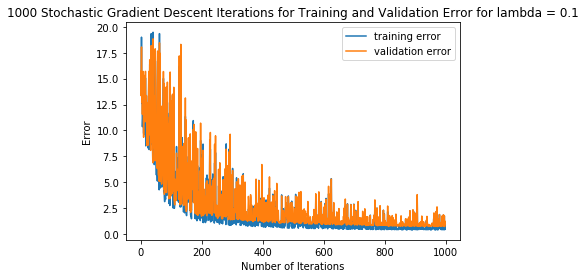

In [23]:
plt.plot(training_error,label='training error')
plt.plot(validation_error,label='validation error')
plt.title('1000 Stochastic Gradient Descent Iterations for Training and Validation Error for lambda = 0.1')
plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.legend()

## 5.

Decide on a best model (and explain why), and return predictions of heart_test.txt labels

In [114]:
heart_test = pd.read_csv('hearttest.csv')
heart_test.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,120,49.0,1.0,3.0,120.0,188.0,0.0,0.0,139.0,0.0,2.0,2.0,3.0,7.0,2
1,152,54.0,0.0,3.0,108.0,267.0,0.0,2.0,167.0,0.0,0.0,1.0,0.0,3.0,1
2,221,65.0,1.0,4.0,135.0,254.0,0.0,2.0,127.0,0.0,2.8,2.0,1.0,7.0,2
3,16,46.0,1.0,4.0,140.0,311.0,0.0,0.0,120.0,1.0,1.8,2.0,2.0,7.0,2
4,222,57.0,1.0,3.0,150.0,168.0,0.0,0.0,174.0,0.0,1.6,1.0,0.0,3.0,1


In [115]:
heart_test = pd.DataFrame(heart_test)
heart_test = heart_test.drop('Unnamed: 0',1)
heart_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,49.0,1.0,3.0,120.0,188.0,0.0,0.0,139.0,0.0,2.0,2.0,3.0,7.0,2
1,54.0,0.0,3.0,108.0,267.0,0.0,2.0,167.0,0.0,0.0,1.0,0.0,3.0,1
2,65.0,1.0,4.0,135.0,254.0,0.0,2.0,127.0,0.0,2.8,2.0,1.0,7.0,2
3,46.0,1.0,4.0,140.0,311.0,0.0,0.0,120.0,1.0,1.8,2.0,2.0,7.0,2
4,57.0,1.0,3.0,150.0,168.0,0.0,0.0,174.0,0.0,1.6,1.0,0.0,3.0,1


In [116]:
heart_test.shape

(54, 14)

The best model I chose is L2-regularized Logistic Regression by Stochastic Gradient Descent with a $\lambda$ of 0.1 because it had the highest F1-Score of 0.78 compared to the rest of the logistic regression models with different $\lambda$ values and compared to the Naive Bayes classifier on the validation set where it had a F1-Score of 0.74. I focused on F1-Score because it is a good measure when it comes to a balance between precision and recall.

#### Side note (future reference):

Naive Bayes is better for small data sets as logistic regression will overfit. Logistic regression is better for large data sets as Naive Bayes underfits.
https://www.cs.princeton.edu/courses/archive/spr07/cos424/scribe_notes/0410.pdf

In [117]:
x_test = heart_test.iloc[:,0:13]
y_test = heart_test.iloc[:,13]

val_model = logreg_sgd(0.1,heart_val)
val_model.predict(x_test)

array([1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 2, 1, 1], dtype=int64)

In [118]:
val_model.score(x_test,y_test)

0.7407407407407407

In [106]:
final_predictions = val_model.predict(x_test)
np.savetxt('heart_test.txt',final_predictions)